In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main_preprocess import load_nifti_convert_to_numpy
from sklearn.mixture import GaussianMixture

/Users/bruger/anaconda3/envs/bachelor/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_ct_010='/Users/bruger/Desktop/Bachelor/data/ct/lungCT_010_0000.nii.gz'
path_ct_025='/Users/bruger/Desktop/Bachelor/data/ct/lungCT_025_0000.nii.gz'

path_res_2d_010='/Users/bruger/Desktop/nnUNet resultater/50 epoch resultater/2d/lungCT_010.nii.gz'
path_res_2d_025='/Users/bruger/Desktop/nnUNet resultater/50 epoch resultater/2d/lungCT_025.nii.gz'

path_res_3d_010='/Users/bruger/Desktop/nnUNet resultater/50 epoch resultater/3d_fullres/lungCT_010.nii.gz'
path_res_3d_025='/Users/bruger/Desktop/nnUNet resultater/50 epoch resultater/3d_fullres/lungCT_025.nii.gz'

In [ ]:
ct_010 = load_nifti_convert_to_numpy(input_path=path_ct_010)
ct_025 = load_nifti_convert_to_numpy(input_path=path_ct_025)

seg_2d_010 = load_nifti_convert_to_numpy(input_path=path_res_2d_010)
seg_2d_025 = load_nifti_convert_to_numpy(input_path=path_res_2d_025)
seg_3d_010 = load_nifti_convert_to_numpy(input_path=path_res_3d_010)
seg_3d_025 = load_nifti_convert_to_numpy(input_path=path_res_3d_025)

In [ ]:
res_2d_010 = np.multiply(ct_010,seg_2d_010)
res_2d_025 = np.multiply(ct_025,seg_2d_025)
res_3d_010 = np.multiply(ct_010,seg_3d_010)
res_3d_025 = np.multiply(ct_025,seg_3d_025)

In [6]:
res_arr_2d_010 = res_2d_010.flatten()
res_arr_2d_025 = res_2d_025.flatten()
res_arr_3d_010 = res_3d_010.flatten()
res_arr_3d_025 = res_3d_025.flatten()

In [32]:
res_arr_2d_010 = res_arr_2d_010[(res_arr_2d_010 != 0) & (res_arr_2d_010 != -10000)]
res_arr_2d_025 = res_arr_2d_025[(res_arr_2d_025 != 0) & (res_arr_2d_025 != -10000)]
res_arr_3d_010 = res_arr_3d_010[(res_arr_3d_010 != 0) & (res_arr_3d_010 != -10000)]
res_arr_3d_025 = res_arr_3d_025[(res_arr_3d_025 != 0) & (res_arr_3d_025 != -10000)]

In [33]:
res_arrs = [res_arr_2d_010, res_arr_2d_025, res_arr_3d_010, res_arr_3d_025]

In [43]:
for res_arr in res_arrs:
    print(min(res_arr))

-1602
-1662
-1682
-20000


In [ ]:
def plot_gmm(data, n_components=2, subsample=100000):
    if data.shape[0] > subsample:
        data = np.random.choice(data, size=subsample, replace=False)  # Downsample
    
    data = data[(data >= -1000) & (data <= -200)]
        
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(data.reshape(-1, 1))  # Reshape the data to 2D for sklearn

    x = np.linspace(-1000, -200, 200).reshape(-1, 1)  # Points to evaluate the model on
    logprob = gmm.score_samples(x)  # Log-likelihood of the GMM at each point
    pdf = np.exp(logprob)  # Convert log-likelihood to PDF

    # Plot the data histogram and the fitted GMM PDF
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=100, density=True, alpha=0.5, color='gray', label='Data histogram')
    plt.plot(x, pdf, label='Fitted GMM', color='red', lw=2)
    plt.title("Gaussian Mixture Model Fit to Data")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


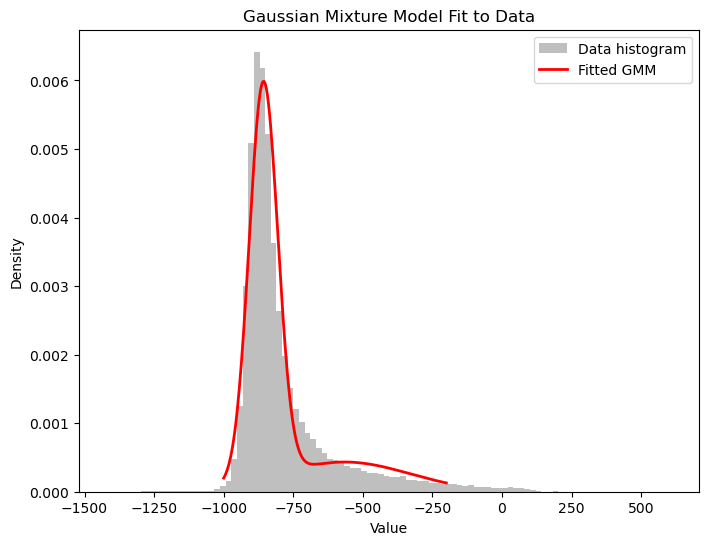

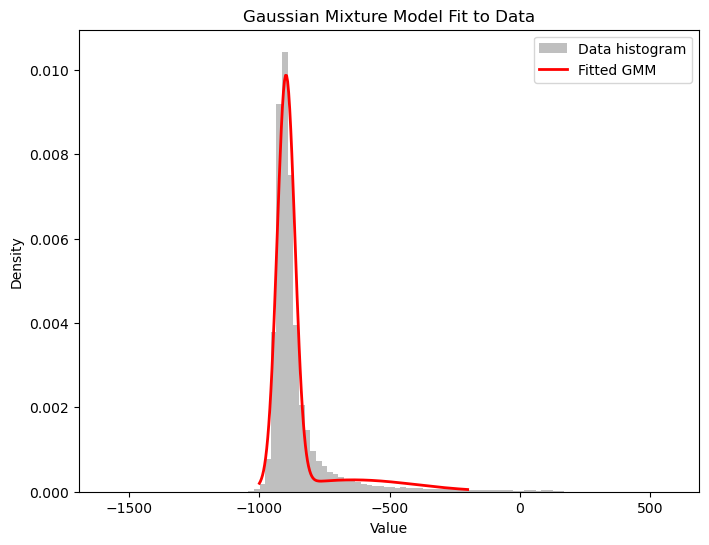

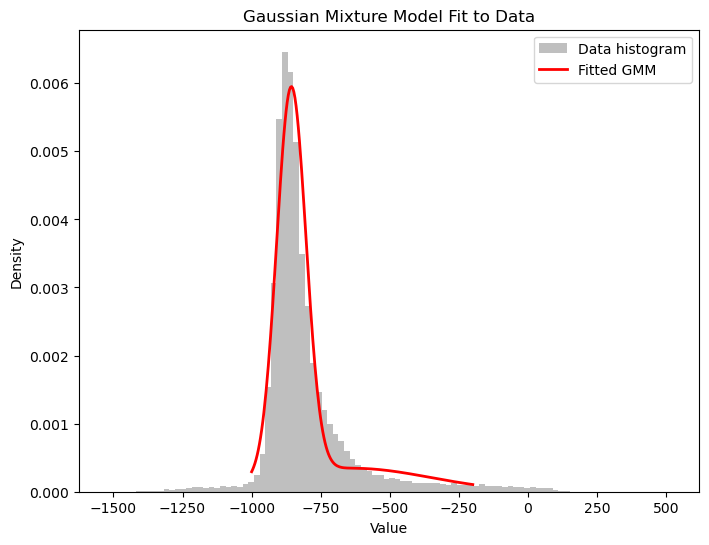

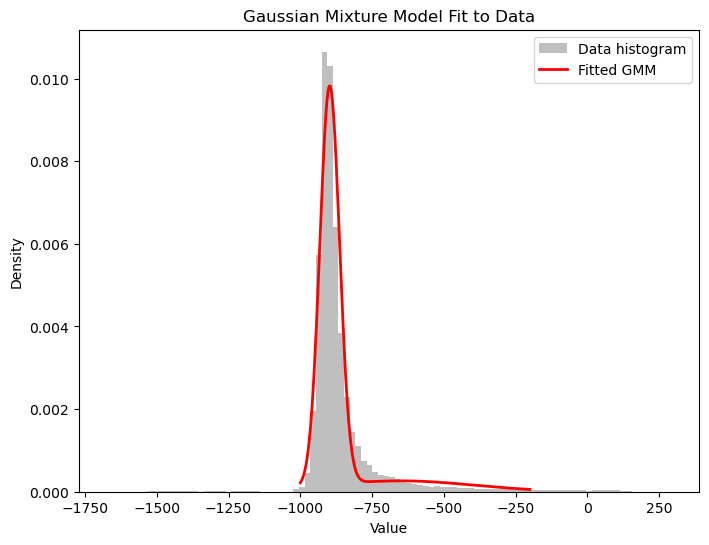

In [65]:
for res_arr in res_arrs:
    plot_gmm(res_arr) 